# Data Entry and Manipulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import openpyxl

In [2]:
data_table = pd.read_csv("Data.csv")
data_table

,Height (cm),Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8
0,100,0.69,0.58,0.64,0.63,0.52,0.51,0.58,0.53
1,150,0.57,0.77,0.63,0.55,0.61,0.66,0.70,0.66
2,200,0.68,0.84,0.82,0.84,0.68,0.72,0.69,0.68


In [3]:
data_table["Mean"] = data_table.loc[:,'Trial 1':'Trial 8'].mean(axis=1)
data_table

,Height (cm),Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Mean
0,100,0.69,0.58,0.64,0.63,0.52,0.51,0.58,0.53,0.58500
1,150,0.57,0.77,0.63,0.55,0.61,0.66,0.70,0.66,0.64375
2,200,0.68,0.84,0.82,0.84,0.68,0.72,0.69,0.68,0.74375


In [4]:
data_table["St Dev"] = data_table.loc[:,'Trial 1':'Trial 8'].std(axis=1)
data_table

,Height (cm),Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Mean,St Dev
0,100,0.69,0.58,0.64,0.63,0.52,0.51,0.58,0.53,0.58500,0.064365
1,150,0.57,0.77,0.63,0.55,0.61,0.66,0.70,0.66,0.64375,0.070900
2,200,0.68,0.84,0.82,0.84,0.68,0.72,0.69,0.68,0.74375,0.075581


In [5]:
n = 8;
data_table["St unc"] = data_table['St Dev']/np.sqrt(n)
data_table

,Height (cm),Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Mean,St Dev,St unc
0,100,0.69,0.58,0.64,0.63,0.52,0.51,0.58,0.53,0.58500,0.064365,0.022756
1,150,0.57,0.77,0.63,0.55,0.61,0.66,0.70,0.66,0.64375,0.070900,0.025067
2,200,0.68,0.84,0.82,0.84,0.68,0.72,0.69,0.68,0.74375,0.075581,0.026722


In [6]:
a = np.sqrt(2/981)  
b = 0.13   

def model_function(x,a,b):      
    #y = a * x + b              
    #y = a * (x**2) + b         
    #y = a * np.log(x) + b
    y = a * np.sqrt(x)+b
    return y
data_table["Model y-values"] = model_function(data_table["Height (cm)"],a,b)
data_table

,Height (cm),Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Mean,St Dev,St unc,Model y-values
0,100,0.69,0.58,0.64,0.63,0.52,0.51,0.58,0.53,0.58500,0.064365,0.022756,0.581524
1,150,0.57,0.77,0.63,0.55,0.61,0.66,0.70,0.66,0.64375,0.070900,0.025067,0.683001
2,200,0.68,0.84,0.82,0.84,0.68,0.72,0.69,0.68,0.74375,0.075581,0.026722,0.768551


In [7]:
data_table["Residuals"] = data_table["Mean"] - data_table["Model y-values"]
data_table ["res^2/stunc^2"] = data_table["Residuals"]**2/data_table["St unc"]**2
data_table

,Height (cm),Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Mean,St Dev,St unc,Model y-values,Residuals,res^2/stunc^2
0,100,0.69,0.58,0.64,0.63,0.52,0.51,0.58,0.53,0.58500,0.064365,0.022756,0.581524,0.003476,0.023337
1,150,0.57,0.77,0.63,0.55,0.61,0.66,0.70,0.66,0.64375,0.070900,0.025067,0.683001,-0.039251,2.451923
2,200,0.68,0.84,0.82,0.84,0.68,0.72,0.69,0.68,0.74375,0.075581,0.026722,0.768551,-0.024801,0.861385


In [8]:
chi_sq= data_table["res^2/stunc^2"].mean()
print("The chi squared for your model is...",np.round(chi_sq,2))


The chi squared for your model is... 1.11


# Graph

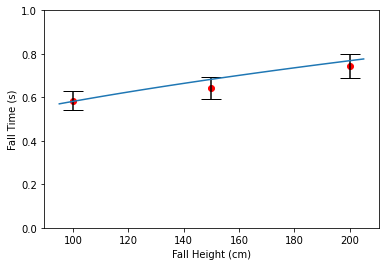

In [9]:
y_vals = data_table["Mean"]
x_vals = data_table["Height (cm)"]
error = 2*data_table["St unc"]

fig, ax = plt.subplots()
ax.scatter(x_vals,y_vals, label = "Data", color = "red")
ax.errorbar(x_vals, y_vals,yerr=error, capsize = 10, color = "black", fmt="none")

ax.set_ylim(0,1)
ax.set_ylabel("Fall Time (s)")
ax.set_xlabel("Fall Height (cm)")

modelx = np.linspace(min(ax.get_xlim()),max(ax.get_xlim()))
modely = model_function(modelx,a,b)
ax.plot(modelx,modely)


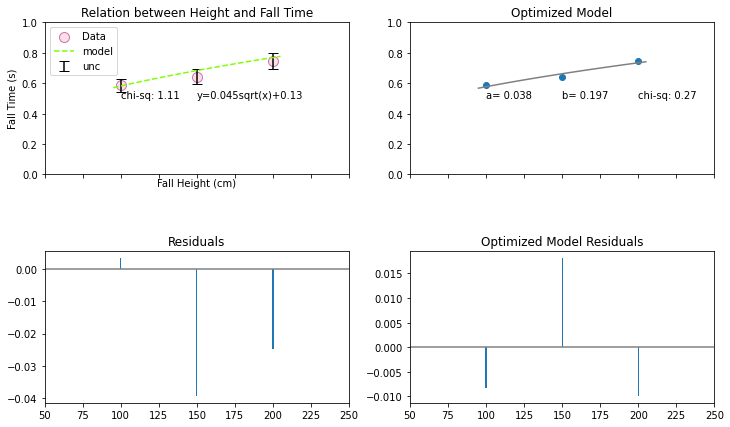

In [10]:
# the super fancy plots for your report
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(12,7))        # that's (2 rows, 2 cols) ... four subplots
fig.subplots_adjust(hspace=0.5)     # make a little extra space between the subplots

# plots data points and errorbars on ax[0,0]
ax[0,0].scatter(x=data_table["Height (cm)"], y=data_table['Mean'], label='Data', color='pink', alpha=.5, edgecolor='purple', s=100)
ax[0,0].errorbar(x=data_table["Height (cm)"], y=data_table['Mean'], yerr=2*data_table['St unc'], label='unc', fmt='none', capsize=5, ecolor='black')
# plots model on ax[0,0]
x_vals = np.linspace(min(ax[0,0].get_xlim()),max(ax[0,0].get_xlim()))  # generates evenly spaced x-values to plot
y_vals = model_function(x_vals,a,b)                           # uses those x-values to make model y-values to plot
ax[0,0].plot(x_vals, y_vals, color= 'chartreuse', label='model', linestyle="--")   # makes a linepolt of the model

# sets some other useful parameters. Change these if you need
ax[0,0].set_xlim(50,250)
ax[0,0].set_ylim(0,1)
ax[0,0].set_ylabel("Fall Time (s)")
ax[0,0].set_xlabel("Fall Height (cm)")
ax[0,0].set_title("Relation between Height and Fall Time")
ax[0,0].legend()                 # displays legend using the 'label' specified in the scatter and line plots above
ax[0,0].text(150, .5, f"y={np.round(a,3)}sqrt(x)+{b}")
ax[0,0].text(100, .5, "chi-sq: " + str(np.round(chi_sq,2)))

# residual plot on ax[1,0]
ax[1,0].set_title("Residuals")
ax[1,0].bar(data_table['Height (cm)'], data_table['Residuals'])
ax[1,0].axhline(0, color='gray')

# plots your model but with optimized coefficients on ax[0,1]
popt, cov = curve_fit(model_function, data_table['Height (cm)'], data_table['Mean']) #scipy's fancy curve fitter

res2 = model_function(data_table["Height (cm)"], popt[0],popt[1])-data_table["Mean"]
m = res2**2/data_table["St unc"]**2
chi_sq2 = m.mean()

ax[0,1].scatter(x=data_table['Height (cm)'], y=data_table['Mean'], label='data')
ax[0,1].plot(x_vals, model_function(x_vals,popt[0],popt[1]), color= 'gray', label='model')        # makes a linepolt of the model
ax[0,1].set_title("Optimized Model")
ax[0,1].text(100, .5, "a= " + round(popt[0],3).astype(str))  # the optimized coefficients of the model
ax[0,1].text(150, .5, "b= " + round(popt[1],3).astype(str))  # the optimized coefficients of the model
ax[0,1].text(200,.5, f"chi-sq: {np.round(chi_sq2,2)}")
ax[0,1].set_xlim(50,250)
ax[0,1].set_ylim(0,1)



# residual plot on ax[1,1]
ax[1,1].set_title("Optimized Model Residuals")
ax[1,1].bar(data_table['Height (cm)'], (model_function(data_table['Height (cm)'],popt[0],popt[1]) - data_table['Mean']))
ax[1,1].axhline(0, color='gray')

plt.show()
fig.savefig("Charts")

In [11]:
data_table.to_excel("Processed Data.xlsx")